In [1]:
import pandas as pd

df = pd.read_csv("G:\\5th semester\\Machine Learning\\lab12\\customer_big_dataset.csv")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1200 non-null   int64  
 1   Age                  1200 non-null   int64  
 2   AnnualIncome         1200 non-null   int64  
 3   SpendingScore        1200 non-null   int64  
 4   City                 1200 non-null   object 
 5   VisitFrequency       1200 non-null   int64  
 6   OnlinePurchaseRatio  1200 non-null   float64
 7   EducationLevel       1200 non-null   int64  
 8   FamilySize           1200 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.5+ KB


In [5]:
from sklearn.preprocessing import  OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df[["City"]])
city_encoded = ohe.transform(df[["City"]])
city_encoded_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(["City"]))
df = pd.concat([df.drop(columns=["City"]), city_encoded_df], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1200 non-null   int64  
 1   Age                  1200 non-null   int64  
 2   AnnualIncome         1200 non-null   int64  
 3   SpendingScore        1200 non-null   int64  
 4   VisitFrequency       1200 non-null   int64  
 5   OnlinePurchaseRatio  1200 non-null   float64
 6   EducationLevel       1200 non-null   int64  
 7   FamilySize           1200 non-null   int64  
 8   City_CityA           1200 non-null   float64
 9   City_CityB           1200 non-null   float64
 10  City_CityC           1200 non-null   float64
 11  City_CityD           1200 non-null   float64
 12  City_CityE           1200 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 122.0 KB


In [9]:
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,VisitFrequency,OnlinePurchaseRatio,EducationLevel,FamilySize,City_CityA,City_CityB,City_CityC,City_CityD,City_CityE
0,1,22,35000,40,12,0.3,2,4,1.0,0.0,0.0,0.0,0.0
1,2,25,42000,48,18,0.4,3,3,0.0,1.0,0.0,0.0,0.0
2,3,31,58000,65,10,0.6,4,5,0.0,0.0,1.0,0.0,0.0
3,4,45,86000,72,15,0.7,3,4,1.0,0.0,0.0,0.0,0.0
4,5,52,120000,38,7,0.2,5,2,0.0,0.0,0.0,1.0,0.0


In [12]:
df.drop(columns=["CustomerID"], inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

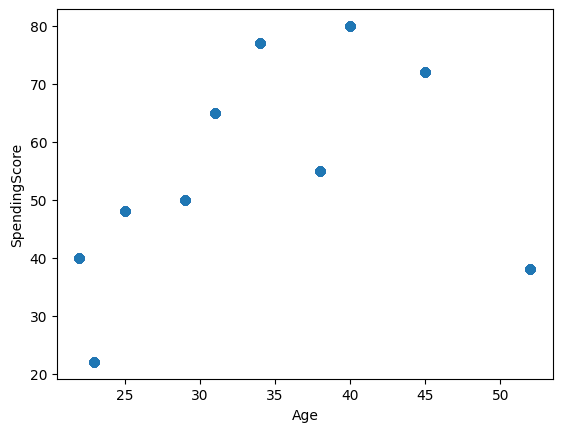

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['SpendingScore'])
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.show()

In [21]:
from sklearn.cluster import KMeans

inertia_list = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia_list.append(km.inertia_)

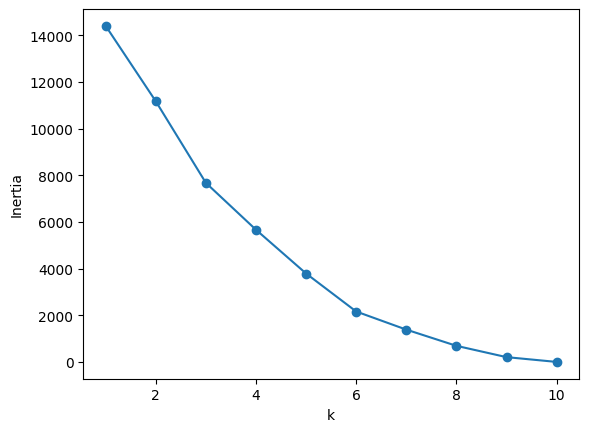

In [22]:
plt.plot(range(1,11), inertia_list, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [24]:
k = 5
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(df)
df = pd.DataFrame(df)
df['Cluster'] = clusters